In [182]:
from HeaderP import *
import seaborn as sns

In [226]:
df = pd.read_pickle('Data/Buck_g2_79e12.pkl')

In [227]:
#plt.figure(figsize=(10,8))
df = df.loc[df['R']>6].reset_index(drop=True)
df = df.loc[df['R']<11].reset_index(drop=True)
df = df.loc[abs(df['z'])<5].reset_index(drop=True)
"""agebins = np.linspace(0,14,100)
fehnorm = df.feh.values
for i in trange(len(agebins)-1):
    m = (df.age>agebins[i])&(df.age<agebins[i+1])
    fehnorm[m] = fehnorm[m]/np.median(fehnorm[m])
df['fehnorm'] = fehnorm"""

"agebins = np.linspace(0,14,100)\nfehnorm = df.feh.values\nfor i in trange(len(agebins)-1):\n    m = (df.age>agebins[i])&(df.age<agebins[i+1])\n    fehnorm[m] = fehnorm[m]/np.median(fehnorm[m])\ndf['fehnorm'] = fehnorm"

Text(0, 0.5, '[O/Fe]')

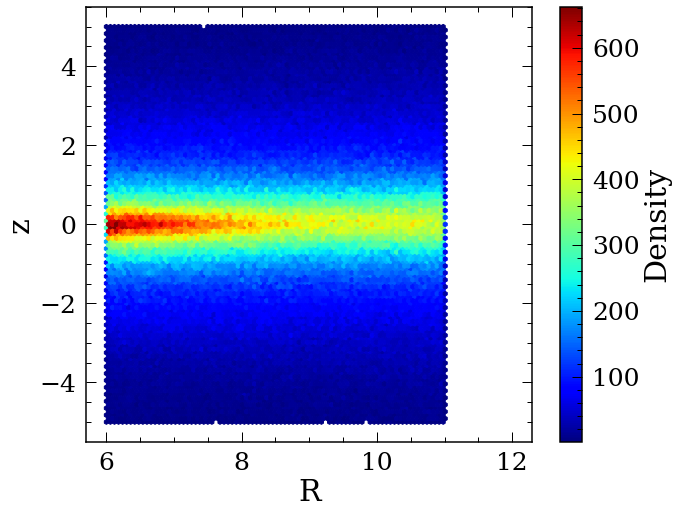

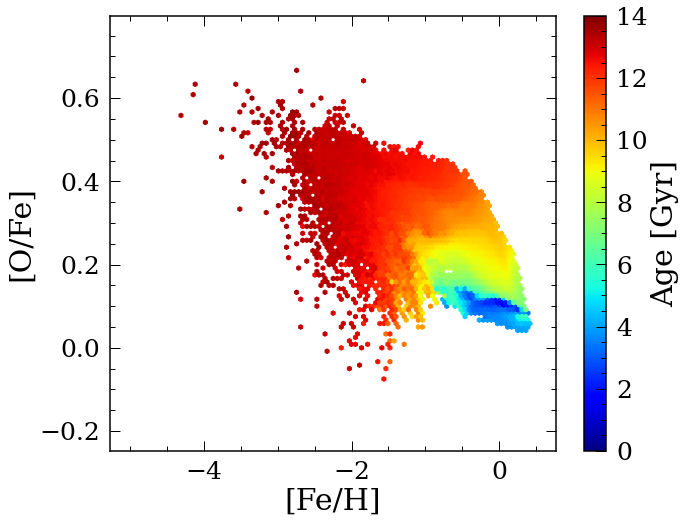

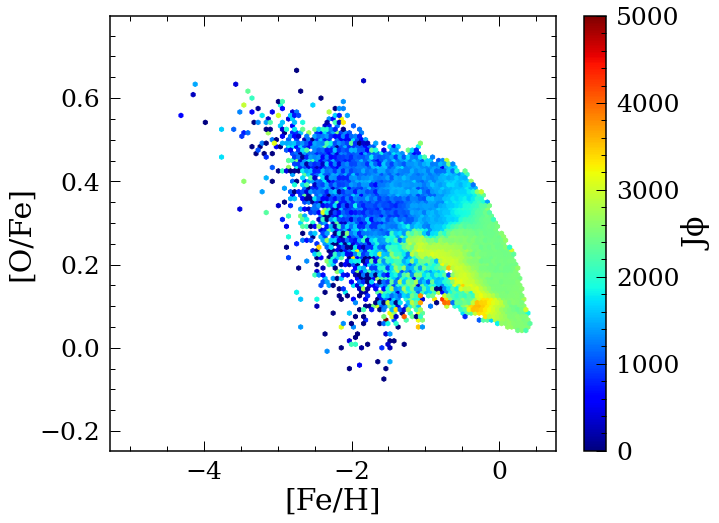

In [228]:
plt.figure(figsize=(10,8))
plt.hexbin(df['R'], df['z'],gridsize=100, extent=(6,12,-5,5), mincnt=1,cmap='jet')
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('R')
plt.ylabel('z')

plt.figure(figsize=(10,8))
plt.hexbin(df['feh'], df['ofe'], C=df['age'], gridsize=100, extent=(-5,0.5,-0.2,0.75),
           mincnt=1,cmap='jet',vmin=0,vmax=14)
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlabel('[Fe/H]')
plt.ylabel('[O/Fe]')


plt.figure(figsize=(10,8))
plt.hexbin(df['feh'], df['ofe'], C=df['Jz'], gridsize=100, extent=(-5,0.5,-0.2,0.75),
           mincnt=1,cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('[Fe/H]')
plt.ylabel('[O/Fe]')

Text(0, 0.5, '[Fe/H]')

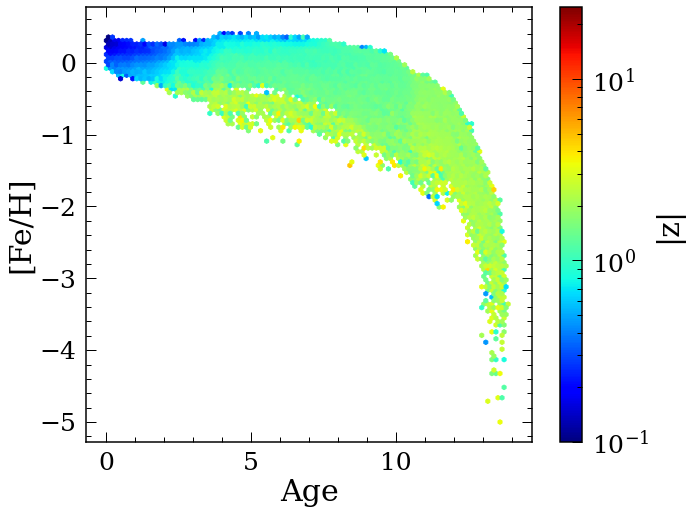

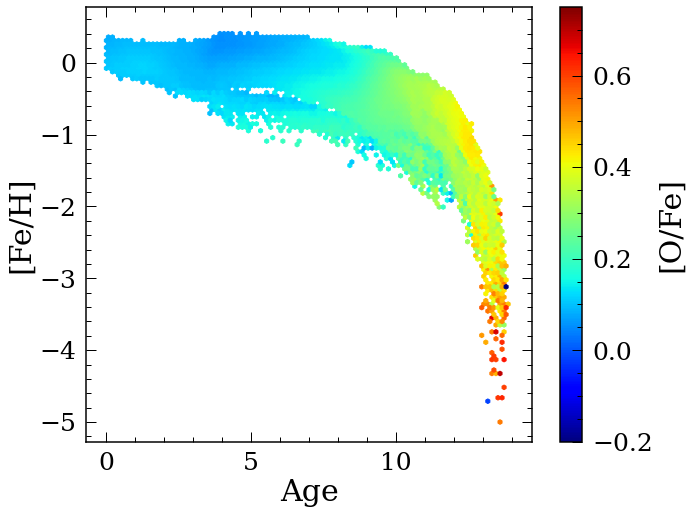

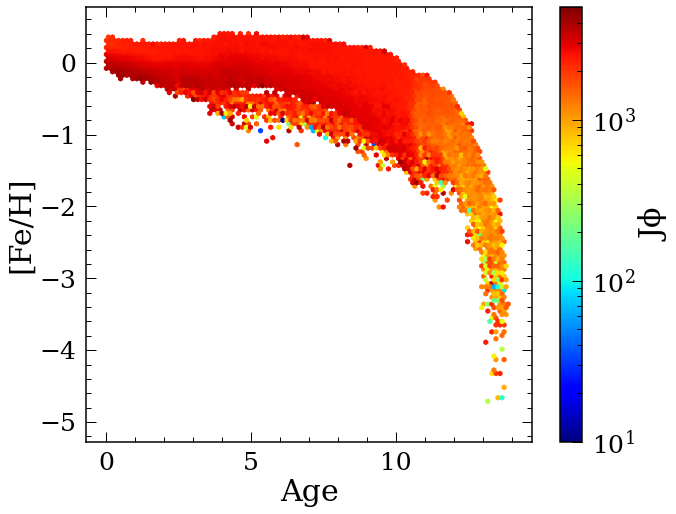

In [229]:

plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['feh'], C=abs(df['z']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0.1,vmax=25,bins='log')
cb = plt.colorbar()
cb.set_label('|z|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')



plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['feh'], C=(df['ofe']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=-0.2,vmax=0.75)
cb = plt.colorbar()
cb.set_label('[O/Fe]')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')




plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['feh'], C=(df['Jz']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=10,vmax=5000,bins='log')
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')



Text(0, 0.5, '[O/Fe]')

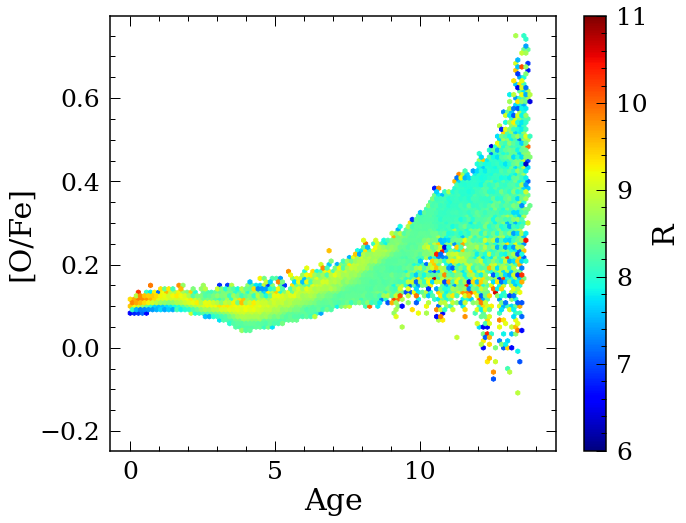

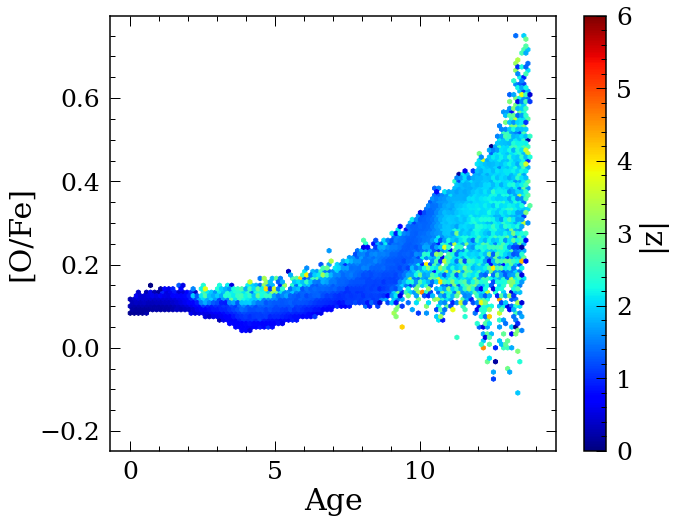

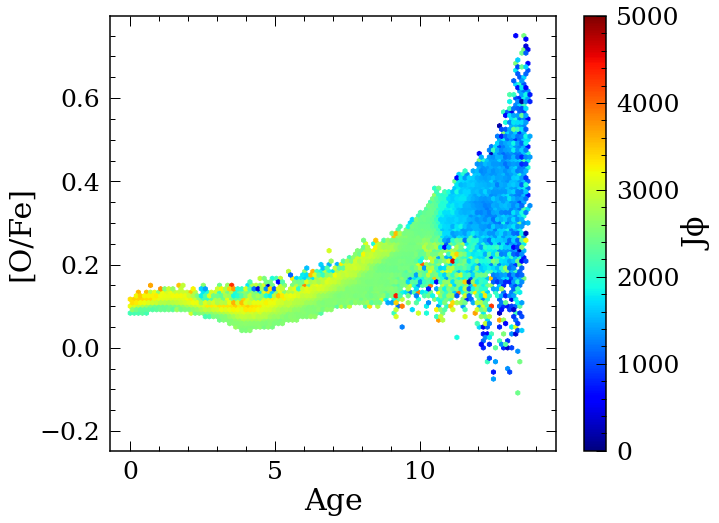

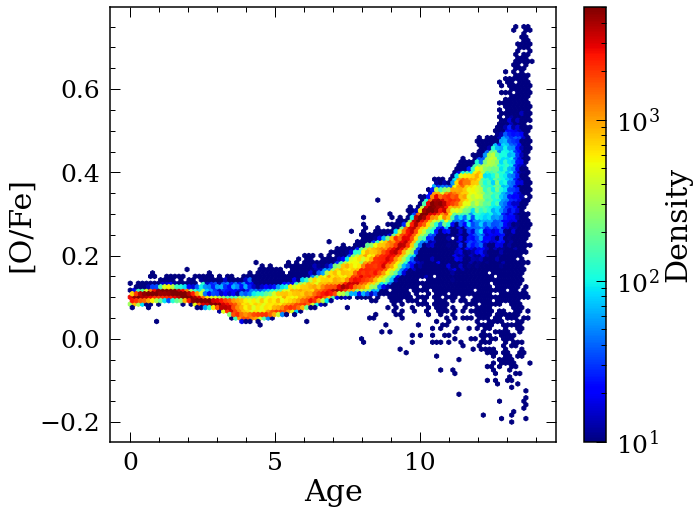

In [248]:

plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['ofe'], C=abs(df['R']),extent=(0,14,-0.2,0.75), 
           gridsize=100, mincnt=1,cmap='jet',vmin=6,vmax=11)
cb = plt.colorbar()
cb.set_label('R')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['ofe'], C=abs(df['z']),extent=(0,14,-0.2,0.75), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=6)
cb = plt.colorbar()
cb.set_label('|z|')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')



plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['ofe'], C=abs(df['Jz']),extent=(0,14,-0.2,0.75), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')



plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['ofe'], extent=(0,14,-0.2,0.75), 
           gridsize=100, mincnt=1,cmap='jet',vmin=10,vmax=5000,bins='log')
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


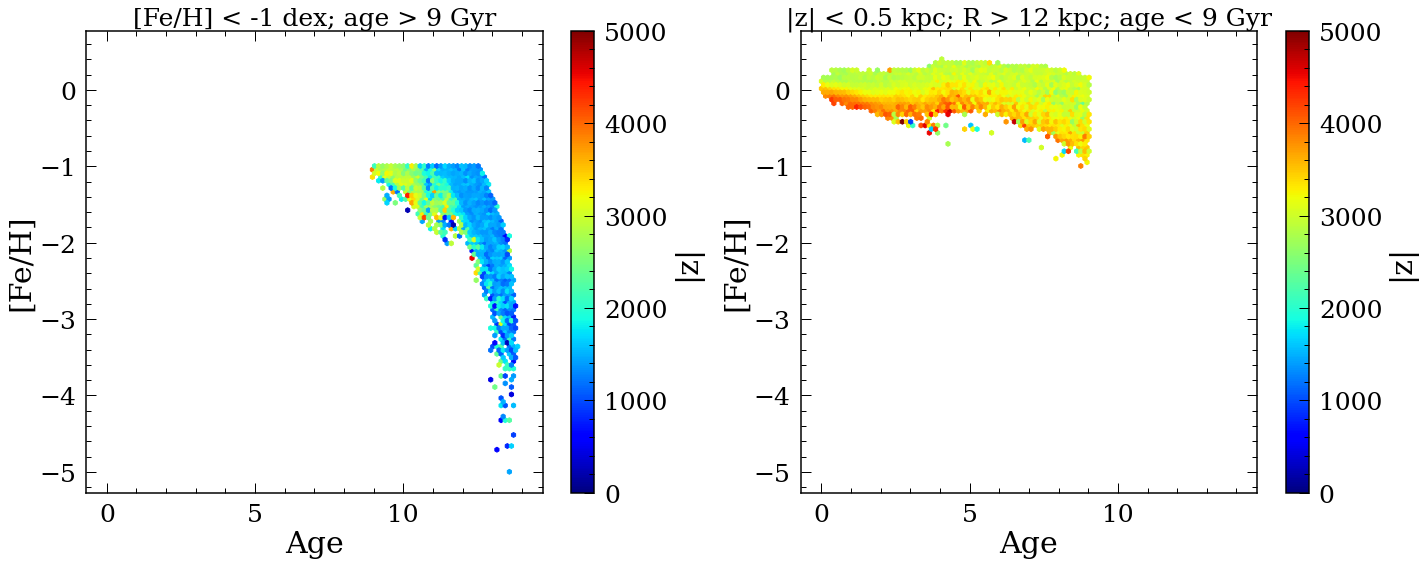

In [245]:
agecut = 9
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
df_halo = df.loc[df['feh']<-1].reset_index(drop=True)
df_halo = df_halo.loc[df_halo['age']>agecut].reset_index(drop=True)
plt.hexbin(df_halo['age'], df_halo['feh'], C=abs(df_halo['Jz']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('|z|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')
plt.title('[Fe/H] < -1 dex; age > 9 Gyr',fontsize=25)


df_thindisk = df.loc[abs(df['z'])<0.5].reset_index(drop=True)
df_thindisk = df_thindisk.loc[df_thindisk['R']>10].reset_index(drop=True)
df_thindisk = df_thindisk.loc[df_thindisk['age']<agecut].reset_index(drop=True)
plt.subplot(1,2,2)
plt.hexbin(df_thindisk['age'], df_thindisk['feh'], 
           C=abs(df_thindisk['Jz']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('|z|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')
plt.title('|z| < 0.5 kpc; R > 12 kpc; age < 9 Gyr',fontsize=25)
plt.tight_layout()


Text(0, 0.5, '[O/Fe]')

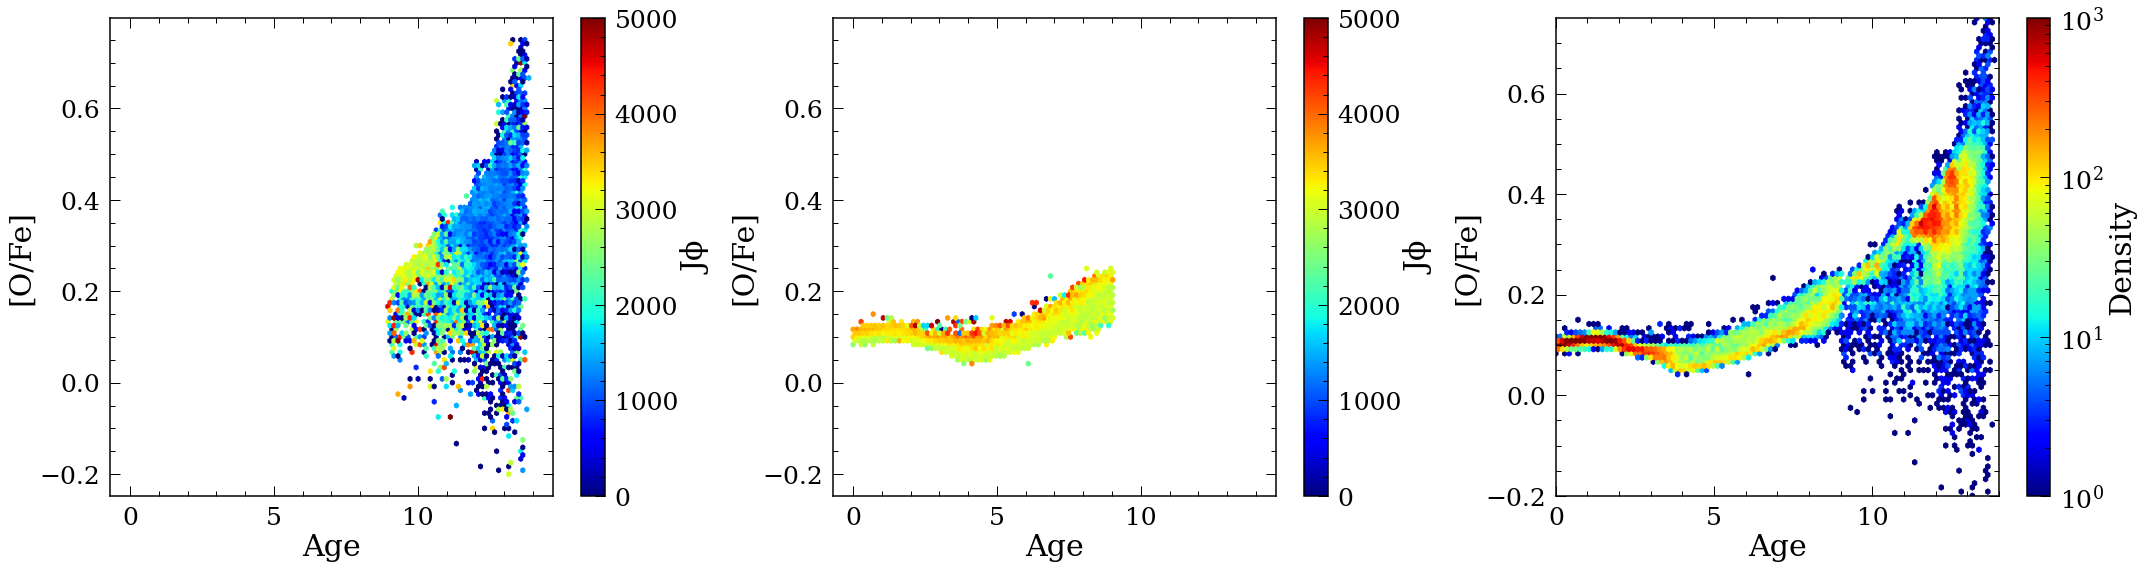

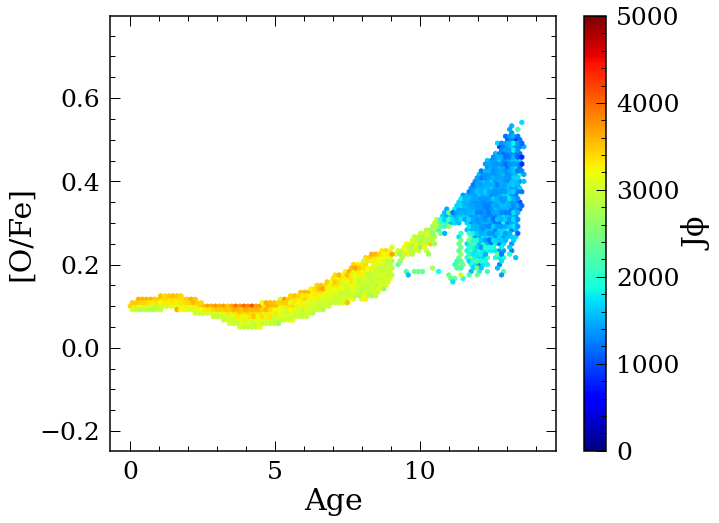

In [246]:


plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.hexbin(df_halo['age'], df_halo['ofe'], C=df_halo['Jz'], extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,2)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=df_thindisk['Jz'], 
           extent=(0,14,-0.2,0.75),cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,3)
plt.hexbin(df_halo['age'], df_halo['ofe'], extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'],  extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')
plt.xlim([0,14])
plt.ylim([-0.2,0.75])

plt.tight_layout()


plt.figure(figsize=(10,8))
plt.hexbin(df_halo['age'], df_halo['ofe'], C=abs(df_halo['Jz']), extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000, mincnt=10)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=abs(df_thindisk['Jz']),
           extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000, mincnt=10)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


Text(0, 0.5, '[O/Fe]')

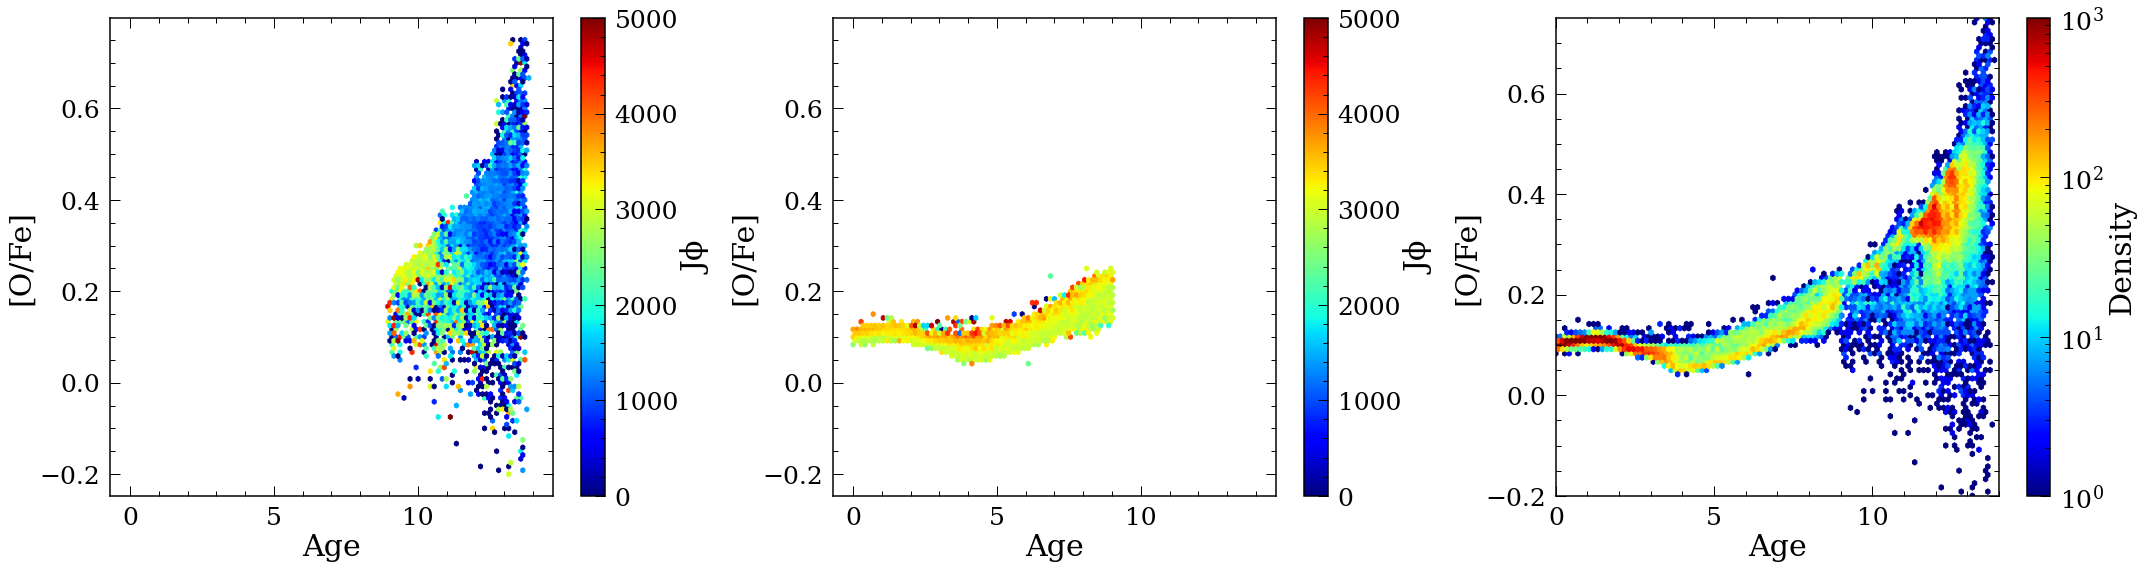

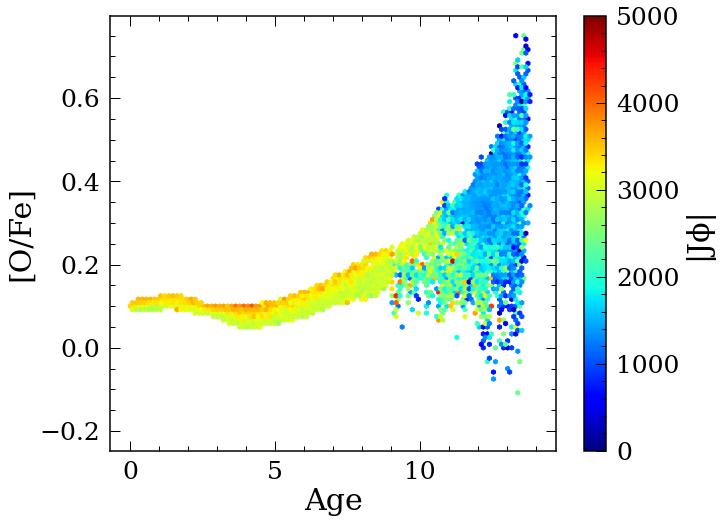

In [247]:


plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.hexbin(df_halo['age'], df_halo['ofe'], C=df_halo['Jz'], extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,2)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=df_thindisk['Jz'], 
           extent=(0,14,-0.2,0.75),cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,3)
plt.hexbin(df_halo['age'], df_halo['ofe'], extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'],  extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')
plt.xlim([0,14])
plt.ylim([-0.2,0.75])

plt.tight_layout()


plt.figure(figsize=(10,8))
plt.hexbin(df_halo['age'], df_halo['ofe'], C=abs(df_halo['Jz']), extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000, mincnt=1)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=abs(df_thindisk['Jz']),
           extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000, mincnt=10)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')

